In [117]:
from scipy import misc, ndimage
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

In [84]:
def readImage(path):
    result = ndimage.imread(path, mode='I')
    return result

In [39]:
def invertImage(image):
    return 255 - image

In [111]:
def showImage(image, size=2):
    plt.figure(figsize = (size, size))
    plt.imshow(image)
    plt.show()

In [58]:
def getSansPathDict(sans):
    path = 'data/sans/' if sans else 'data/serif/'
    letters = [chr(i) for i in range(97,123)]
    sansPathDict = {}
    for l in letters:
        sansPathDict[l] = path + l + '.png'
    return sansPathDict

In [94]:
def getLetters(sans=True):
    paths = getSansPathDict(sans)
    return [invertImage(readImage(paths[path])) for path in paths]

In [109]:
def getImageFFT(path):
    image = readImage(path)
    image = invertImage(image)
    return np.fft.fft2(image)

In [108]:
def countLetter(img, letter, color, threshold=0.82):
    #fi = np.fft.fft2(img)
    fi = img
    fp = np.fft.fft2(np.rot90(letter, 2), fi.shape)  # nie pasuja wymiary to dopisze automagicznie zera
    m = np.multiply(fi, fp)
    corr = np.fft.ifft2(m)
    corr = np.abs(corr)
    corr = corr.astype(float)
    corr[corr < threshold * np.amax(corr)] = 0
    corr[corr != 0] = color
    return corr

In [122]:
def getLetterPositions(correlation, letter):
    positions = []
    lw, lh = letter.shape
    tmpi, tmpj = (-1 *lw, -1*lh)
    for (i, j), val in np.ndenumerate(correlation):
        if val > 0.0 and not (tmpi + lw > i and tmpj + lh > j):
            positions.append((i, j))
            tmpi, tmpj = i, j
    return positions

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


9.92804799999999


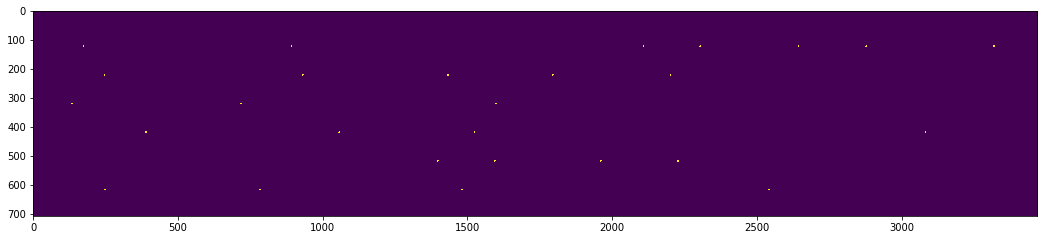

In [119]:
start = time.clock()
correlation = countLetter(getImageFFT('data/sans/facebook.png'), getLetters()[0], 128)
print(time.clock() - start)
showImage(correlation, 18)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


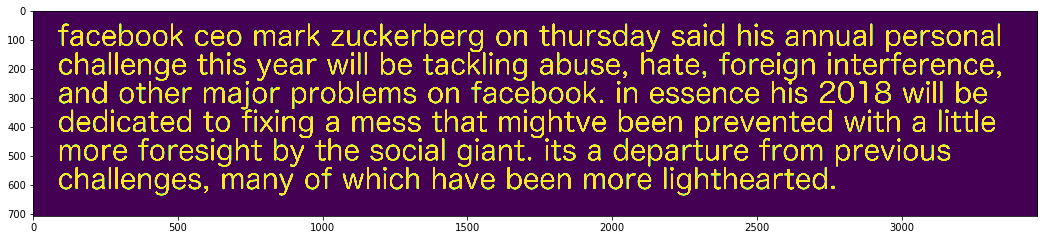

In [116]:
showImage(invertImage(readImage('data/sans/facebook.png')),18)

In [124]:
pos = getLetterPositions(correlation, getLetters()[0])


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


[(119, 172), (119, 891), (119, 2107), (119, 2302), (119, 2642), (119, 2875), (119, 3316), (218, 246), (218, 930), (218, 1432), (218, 1794), (218, 2200), (317, 133), (317, 717), (317, 1598), (416, 388), (416, 1055), (416, 1522), (416, 3080), (515, 1397), (515, 1593), (515, 1959), (515, 2226), (614, 246), (614, 781), (614, 1480), (614, 2541)]


In [125]:
print(len(pos))

27
